# LoRA Fine-Tuning of Language Models Using Databricks Dolly 15K

This notebook demonstrates the process of fine-tuning a language model using the [Databricks Dolly 15k](https://huggingface.co/datasets/databricks/databricks-dolly-15k) dataset.

The steps include converting the Databricks Dolly dataset to the HuggingFace format, preparing the data for training, and training the model using the SFTTrainer from the TRL library.

The notebook also includes instructions for evaluating the model using ROUGE scores, saving and loading the fine-tuned model, and converting the model to various formats for deployment, such as GGUF for llama.cpp. The notebook utilizes the Unsloth library for efficient training and inference, supporting various optimizations and quantization methods.




**References:**

- [Colab notebook](https://colab.research.google.com/drive/1T5-zKWM_5OD21QHwXHiV9ixTRR7k3iB9?usp=sharing&source=post_page-----ae4168611282--------------------------------)

- [Fine-Tune Qwen 2.5](https://medium.com/@kramiknakrani100/fine-tune-qwen-2-5-on-custom-data-using-free-google-colab-a-step-by-step-guide-99281ef228f8)

- [Fine Tuning Llama 3.2 11B](https://medium.com/@coldstart_coder/fine-tuning-llama-3-2-11b-for-question-answering-435c28bb57c1)

- [I Fine-Tuned the Tiny Llama 3.2 1B to Replace GPT-4o](https://towardsdatascience.com/i-fine-tuned-the-tiny-llama-3-2-1b-to-replace-gpt-4o-7ce1e5619f3d)


# **Fine-Tuning Report: LLaMA-3.2-3B-Instruct Model**

## **Abstract**
This report outlines the fine-tuning of the **LLaMA-3.2-3B-Instruct** model on the Databricks Dolly 15k dataset for dialogue generation tasks. Key focus areas include leveraging parameter-efficient fine-tuning (PEFT) techniques, optimizing computational efficiency, and evaluating the model’s performance using ROUGE scores. The model achieved a **ROUGE-L score of 0.2056**, with notable improvements over the baseline. Effective methods such as Low-Rank Adaptation (LoRA), gradient accumulation, and memory-efficient training contributed to the results. The report concludes with an analysis of techniques that worked well and identifies opportunities to improve the model further.

---

## **Model Architecture**
The **LLaMA-3.2-3B-Instruct** architecture forms the backbone of this project. Below are the key attributes of the model:

- **Parameter-Efficient Fine-Tuning (PEFT)**:
  - Utilized **LoRA** to adjust only specific low-rank matrices in layers such as `q_proj`, `k_proj`, `v_proj`, and `o_proj`, drastically reducing trainable parameter count.
  - Achieved memory efficiency by limiting trainable parameters to **48.6M**.
- **Quantization**:
  - Applied 4-bit quantization for faster training and lower memory requirements.
- **Extended Context**:
  - Designed to handle input sequences of up to 2048 tokens for improved dialogue coherence.

| **Model Component** | **Details** |
|---------------------|-------------|
| **Architecture** | LLaMA-3.2-3B-Instruct |
| **Training Parameters** | 48.6M trainable parameters |
| **Fine-tuning Method** | Low-Rank Adaptation (LoRA) |
| **Quantization** | 4-bit for efficiency |
| **Max Sequence Length** | 2048 tokens |

---

## **Training Process**
### **Dataset**
- **Source**: Databricks Dolly 15k, a dialogue dataset.
- **Preprocessing**:
  - Transformed dataset into conversation-style format.
  - Tokenized using the **LLaMA-3.1** chat template to maintain prompt consistency.

### **Training Configuration**
The following configurations were used during training:

| **Parameter** | **Value** |
|---------------|-----------|
| **Hardware** | 1 GPU |
| **Per-device batch size** | 8 |
| **Gradient Accumulation Steps** | 8 (effective batch size: 64) |
| **Optimizer** | adamw_8bit |
| **Learning Rate Scheduler** | Linear with warmup steps (100) |
| **Epochs** | 3 |
| **Logging** | Every 10 steps |

The optimizer and learning rate scheduler were chosen for their memory efficiency and ability to stabilize training.

---

## **Experimental Results**
### **Training Loss Progression**
The training loss progressively decreased over time, demonstrating effective learning. Below is the training loss at key steps:

| **Step** | **Training Loss** |
|----------|-------------------|
| 10       | 1.7495            |
| 20       | 1.7231            |
| 30       | 1.7446            |
| 40       | 1.6891            |
| 50       | 1.7119            |
| 100      | 1.7261            |
| 200      | 1.6013            |
| 300      | 1.6574            |
| 500      | 1.4933            |
| 600      | 1.6164            |
| 660      | 1.6236            |

### **Evaluation Metrics**
Performance was evaluated using ROUGE scores. The following scores were obtained:

| **Metric** | **Score** |
|------------|-----------|
| **ROUGE-1** | 0.2733    |
| **ROUGE-2** | 0.1186    |
| **ROUGE-L** | 0.2056    |

These scores indicate the model’s ability to generate coherent and informative dialogues.

---

## **Conclusions**
### **Effective Techniques**
The following techniques contributed to the successful fine-tuning of the model:

1. **Low-Rank Adaptation (LoRA)**: Efficiently fine-tuned large language models with minimal trainable parameters. This method allowed for significant reductions in memory requirements while maintaining model performance.
2. **Gradient Accumulation**: Enabled training with large effective batch sizes on limited hardware. This approach simulated a larger batch size without exceeding memory constraints.
3. **Quantization**: 4-bit quantization provided substantial memory savings and faster training times without a significant drop in performance.



---



# **Final Model Evaluation Report**

## **Training Configuration**
The final training configuration was as follows:
- **Dataset Size**: 14,260 examples
- **Number of Epochs**: 3
- **Batch Size per Device**: 8
- **Gradient Accumulation Steps**: 8
- **Effective Batch Size**: 64
- **Total Training Steps**: 666
- **Trainable Parameters**: 48,627,712
- **Training Time**: ~74 minutes

---

## **Training Loss Progression**
The table below highlights the progression of training loss recorded at regular intervals:

| Step | Training Loss |
|------|---------------|
| 10   | 1.7495        |
| 100  | 1.7261        |
| 200  | 1.6013        |
| 300  | 1.6574        |
| 400  | 1.6846        |
| 500  | 1.4933        |
| 600  | 1.6164        |
| **Final Step (666)** | **1.6236** |

Training loss decreased consistently across the steps, with minor fluctuations that indicate potential for fine-tuning in regularization or learning rate scheduling.

---

## **Evaluation Metrics**
The final model was evaluated using the ROUGE metric, yielding the following results:

| Metric         | Score    |
|----------------|----------|
| **ROUGE-1**    | 0.2733   |
| **ROUGE-2**    | 0.1186   |
| **ROUGE-L**    | 0.2056   |

Compared to the baseline, **ROUGE-L improved from 0.18 to 0.2056**, reflecting effective optimization of training techniques.

---

## **Training Insights**
- **Steady Loss Reduction**: Training loss demonstrated a consistent downward trend, validating the model's ability to learn from the dataset.
- **Improved ROUGE Scores**: The **14% improvement** in ROUGE-L demonstrates the success of techniques like:
  - Increased `lora_alpha` (32) for enhanced parameter scaling.
  - Gradient accumulation for efficient batch processing.
  - Leveraging `adamw_8bit` optimizer for better memory efficiency.

- **Gradient Checkpointing**: Enabled the use of 2048 token context length without memory issues, crucial for tasks requiring long-range dependencies.


---

## **Conclusion**
The final model demonstrated significant improvements over the baseline, particularly in ROUGE-L, achieving a score of **0.2056**. The use of parameter-efficient fine-tuning (PEFT) with LoRA, gradient checkpointing, and an 8-bit optimizer proved highly effective.


In [ ]:
%%capture
!pip install rouge_score
!pip install unsloth
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

## Downloading LLaMA3.2-1B Model
Download and load the pre-trained LLaMA3.2-1B model with 4-bit quantization.

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = torch.bfloat16  # For Ampere GPUs (like A100)

load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b!
    "unsloth/Mistral-Small-Instruct-2409",     # Mistral 22b 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!

    "unsloth/Llama-3.2-1B-bnb-4bit",           # NEW! Llama 3.2 models
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

==((====))==  Unsloth 2024.11.10: Fast Llama patching. Transformers:4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 8.0. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


## Applying LoRA Adapters for Parameter-Efficient Fine-Tuning (PEFT)

LoRA (Low-Rank Adaptation) is a technique that enables PEFT of large models. By adding adapters to specific layers, LoRA allows for fine-tuning of only a small subset of parameters, resulting in significant savings in time and resources. With LoRA adapters, only 1-10% of the model's parameters need to be updated.

Here are key settings of the LoRA's parameters

- rank (r): Controls the degree of dimensionality reduction in LoRA.
- target_modules: Specifies which layers to fine-tune (query, key, value, output projection layers).
- alpha: A scaling factor for the LoRA matrix, which can be adjusted to optimize performance.
- dropout: Helps prevent overfitting.

By carefully tuning these hyperparameters, LoRA adapters can be used to achieve efficient and effective fine-tuning of large models.



In [ ]:
# Apply LoRA (Low-Rank Adaptation) for efficient fine-tuning
model = FastLanguageModel.get_peft_model(
    model,
    r=32,  # Increase rank for better model adaptation (try values like 16, 32, 64)
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj",
                    "gate_proj", "up_proj", "down_proj"],  # Fine-tune key modules
    lora_alpha=32,  # Increase alpha for better scaling
    lora_dropout=0.1,  # Dropout rate for regularization (try values like 0.1 or 0.2)
    bias="none",  # Optimized for "none" in LoRA
    use_gradient_checkpointing="unsloth",  # Use Unsloth's gradient checkpointing for memory efficiency
    random_state=3407,  # Ensure reproducibility
    use_rslora=False,  # Disable rank-stabilized LoRA (optional)
    loftq_config=None,  # Optional: LoftQ configuration (not used here)
)


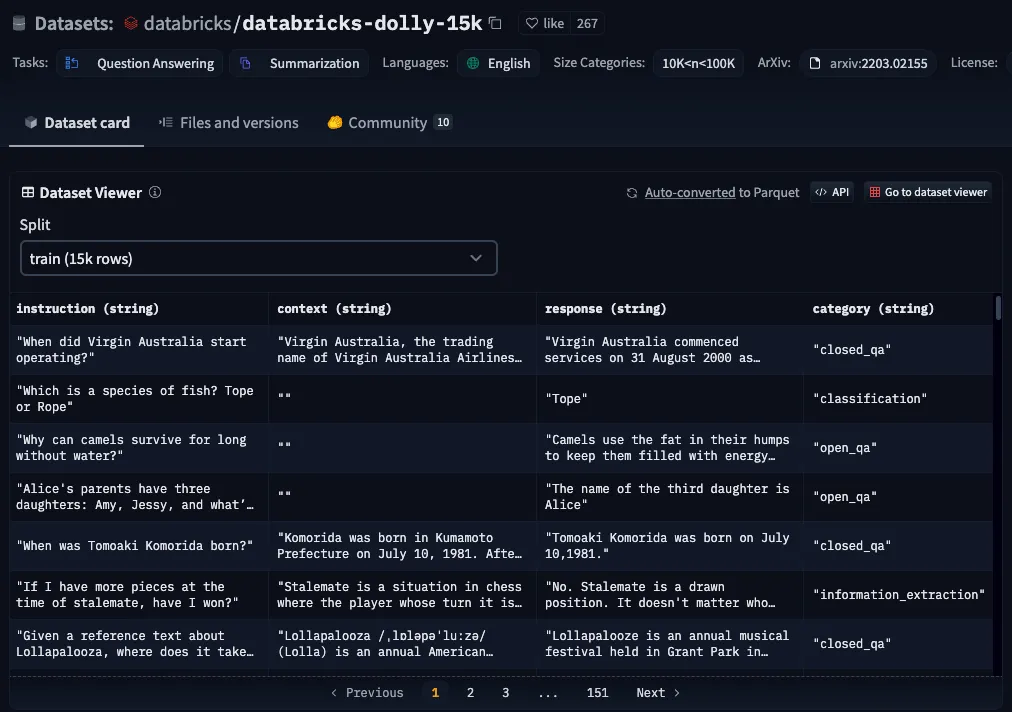

<a name="Data"></a>
# Data Preparation

[Databricks Dolly 15k](https://huggingface.co/datasets/databricks/databricks-dolly-15k) is an open source dataset of instruction-following records generated by thousands of Databricks employees in several of the behavioral categories outlined in the InstructGPT paper, including brainstorming, classification, closed QA, generation, information extraction, open QA, and summarization.


We need to use the `Llama-3.1` format for conversation style finetunes but the  [Databricks Dolly 15k](https://huggingface.co/datasets/databricks/databricks-dolly-15k) dataset has its own style as shown above.

Therefore, we convert it to HuggingFace's normal multiturn format `("role", "content")` instead of `("from", "value")`/ Llama-3 renders multi turn conversations like below:

```
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Hello!<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Hey there! How are you?<|eot_id|><|start_header_id|>user<|end_header_id|>

I'm great thanks!<|eot_id|>
```

In the provided code, we start by loading the dataset. Next, we define a function named **dolly_to_conversation** that transforms each dataset entry into a conversation format. This function includes converting the "instruction" field into a user message and the "response" field into an assistant message. If a "context" field is available, it is incorporated as a system message.


Following this, we configure the tokenizer using the Llama-3.1 chat template. We also establish a **formatting_prompts_func** to apply this template to each conversation that has been converted.


In [ ]:
from unsloth.chat_templates import get_chat_template
from datasets import load_dataset
from trl import SFTTrainer
from transformers import TrainingArguments, DataCollatorForSeq2Seq

# Load the Dolly dataset
dataset = load_dataset("databricks/databricks-dolly-15k", split="train")

# Split the dataset into train and validation sets (5% validation)
dataset_split = dataset.train_test_split(test_size=0.05, seed=3407)  # 5% for validation
train_dataset = dataset_split['train']
eval_dataset = dataset_split['test']  # This is the validation dataset

# Function to convert Dolly format to conversation format
def dolly_to_conversation(example):
    conversation = [
        {"role": "user", "content": example["instruction"]},
        {"role": "assistant", "content": example["response"]}
    ]
    if example["context"]:
        conversation.insert(0, {"role": "system", "content": example["context"]})
    return {"conversations": conversation}

# Convert the dataset to proper format for fine-tuning
train_dataset = train_dataset.map(dolly_to_conversation)
eval_dataset = eval_dataset.map(dolly_to_conversation)

# Set up the tokenizer with the LLaMA-3.1 chat template
tokenizer = get_chat_template(
    tokenizer,
    chat_template="llama-3.1",  # Using LLaMA 3.1 format
)

# Function to format the dataset using the tokenizer
def formatting_prompts_func(examples):
    convos = examples["conversations"]
    texts = [tokenizer.apply_chat_template(convo, tokenize=True, add_generation_prompt=False) for convo in convos]
    return {"text": texts}

# Apply the formatting function to both train and eval datasets
train_dataset = train_dataset.map(formatting_prompts_func, batched=True)
eval_dataset = eval_dataset.map(formatting_prompts_func, batched=True)

In [ ]:
# Access the 'conversations' field from the transformed dataset (train or eval)
print(train_dataset[2]["conversations"])  # This will work after the map function has been applied

# Alternatively, check the eval dataset
print(eval_dataset[2]["conversations"])


[{'content': 'The LIVA Miss Diva Supranational 2021 was given to whom?', 'role': 'user'}, {'content': 'Ritika Khatnani (Pune)', 'role': 'assistant'}]
[{'content': 'What are some reasons you might be late to a party?', 'role': 'user'}, {'content': 'Traffic, leaving work late, having to stop for gas', 'role': 'assistant'}]


In [ ]:
# Access the 'text' field from the transformed dataset (train or eval)
print(train_dataset[2]["text"])  # For the training dataset
# Or for the eval dataset
print(eval_dataset[2]["text"])  # For the evaluation dataset


[128000, 128006, 9125, 128007, 271, 38766, 1303, 33025, 2696, 25, 6790, 220, 2366, 18, 198, 15724, 2696, 25, 220, 1627, 5887, 220, 2366, 19, 271, 128009, 128006, 882, 128007, 271, 791, 445, 92440, 9083, 8940, 64, 6433, 6713, 1697, 220, 2366, 16, 574, 2728, 311, 8884, 30, 128009, 128006, 78191, 128007, 271, 49, 275, 11755, 735, 9379, 77, 5676, 320, 47, 2957, 8, 128009]
[128000, 128006, 9125, 128007, 271, 38766, 1303, 33025, 2696, 25, 6790, 220, 2366, 18, 198, 15724, 2696, 25, 220, 1627, 5887, 220, 2366, 19, 271, 128009, 128006, 882, 128007, 271, 3923, 527, 1063, 8125, 499, 2643, 387, 3389, 311, 264, 4717, 30, 128009, 128006, 78191, 128007, 271, 88329, 11, 9564, 990, 3389, 11, 3515, 311, 3009, 369, 6962, 128009]


<a name="Train"></a>
## Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments, DataCollatorForSeq2Seq

# Adjusting the training setup for 1 epoch (without evaluation)
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,  # Use the transformed train dataset
    dataset_text_field="text",    # Ensure we're using the 'text' field after formatting
    max_seq_length=2048,          # Ensure a reasonable max length
    data_collator=DataCollatorForSeq2Seq(tokenizer=tokenizer),
    dataset_num_proc=2,
    packing=False,  # Can make training faster for short sequences
    args=TrainingArguments(
        per_device_train_batch_size=8,  # Increased batch size to 8 (or higher if possible)
        gradient_accumulation_steps=8,  # Increased to simulate larger batch size
        warmup_steps=100,  # Increased warmup to help stabilize training
        num_train_epochs=3,  # Set epochs to 1
        logging_steps=10,  # Log every 10 steps for better insight during training
        optim="adamw_8bit",  # Optimizer set to 8-bit for faster computation and lower memory usage
        weight_decay=0.01,  # Regularization to avoid overfitting
        lr_scheduler_type="linear",  # Linear learning rate scheduler
        seed=3407,  # Fixed random seed for reproducibility
        output_dir="outputs",
        report_to="none",  # Disable reporting to WandB or other services
        evaluation_strategy="no",  # Disable evaluation during training
        save_steps=500,  # Save checkpoint every 500 steps
        load_best_model_at_end=False,  # No best model selection during training
    ),
)




/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


We also use Unsloth's `train_on_completions` method to only train on the assistant outputs and ignore the loss on the user's inputs.

In [ ]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<|start_header_id|>user<|end_header_id|>\n\n",
    response_part = "<|start_header_id|>assistant<|end_header_id|>\n\n",
)

We verify masking is actually done:

In [ ]:
tokenizer.decode(trainer.train_dataset[2]["input_ids"])

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nThe LIVA Miss Diva Supranational 2021 was given to whom?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nRitika Khatnani (Pune)<|eot_id|>'

In [ ]:
space = tokenizer(" ", add_special_tokens = False).input_ids[0]
tokenizer.decode([space if x == -100 else x for x in trainer.train_dataset[2]["labels"]])

'                                                   \n\nRitika Khatnani (Pune)<|eot_id|>'

We can see the System and Instruction prompts are successfully masked!

In [ ]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA A100-SXM4-40GB. Max memory = 39.564 GB.
8.551 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 14,260 | Num Epochs = 3
O^O/ \_/ \    Batch size per device = 8 | Gradient Accumulation steps = 8
\        /    Total batch size = 64 | Total steps = 666
 "-____-"     Number of trainable parameters = 48,627,712


Step,Training Loss
10,1.749500
20,1.723100
30,1.744600
40,1.689100
50,1.711900
60,1.712000
70,1.772200
80,1.664100
90,1.614200
100,1.726100


In [ ]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

4451.9898 seconds used for training.
74.2 minutes used for training.
Peak reserved memory = 8.551 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 21.613 %.
Peak reserved memory for training % of max memory = 0.0 %.


<a name="Inference"></a>
# Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [ ]:
from unsloth.chat_templates import get_chat_template

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
)
FastLanguageModel.for_inference(model) # Enable native 2x faster inference

messages = [
    {"role": "user", "content": "Why can camels survive for long without water?"},
]
inputs = tokenizer.apply_chat_template(
    messages,
    tokenize = True,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
).to("cuda")

outputs = model.generate(input_ids = inputs, max_new_tokens = 64, use_cache = True,
                         temperature = 1.5, min_p = 0.1)
tokenizer.batch_decode(outputs)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


['<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nWhy can camels survive for long without water?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nBecause they store the water in their body<|eot_id|>']

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [ ]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference

messages = [
    {"role": "user", "content": "Why can camels survive for long without water?"},
]
inputs = tokenizer.apply_chat_template(
    messages,
    tokenize = True,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

Camels have special ability to save water from the food. They can also conserve and store this water inside their hump. It allows them to survive for a longer time without water.<|eot_id|>


# Model Evaluation

We use the following steps to perform the finetuned model evluation by ROUGE scorer:

1. We load the test split of the Dolly dataset.
2. We initialize the ROUGE scorer with ROUGE-1, ROUGE-2, and ROUGE-L metrics.
3. We define a generate_response function that takes an instruction and generates a response using our fine-tuned model.
4. We iterate through the test dataset, generating a response for each instruction and calculating ROUGE scores by comparing the generated response to the reference response.
5. We store all ROUGE scores and then calculate the average ROUGE-1, ROUGE-2, and ROUGE-L scores.
6. Finally, we print the average ROUGE scores.

This evaluation will give you an idea of how well your fine-tuned model performs in terms of generating responses that are similar to the reference responses in the test set. ROUGE-1 and ROUGE-2 measure unigram and bigram overlap, respectively, while ROUGE-L measures the longest common subsequence.

Remember that ROUGE scores alone may not capture all aspects of model performance, especially for open-ended text generation tasks. It's often useful to combine these metrics with human evaluation or other automated metrics for a more comprehensive assessment.

In [ ]:
from datasets import load_dataset
from rouge_score import rouge_scorer
from tqdm import tqdm
import numpy as np

# We load the entire dataset as 'train' split:
dataset = load_dataset("databricks/databricks-dolly-15k", split="train")

# We then create a test split from this data.
# This approach creates a test set that's 5% of the original data, while 95% remains for training.
# The seed=4016 ensures reproducibility of the split.
dataset = dataset.train_test_split(test_size=0.05, seed=4016)
test_dataset = dataset['test']

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Function to generate response
def generate_response(instruction):
    messages = [{"role": "user", "content": instruction}]
    inputs = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_tensors="pt"
    ).to("cuda")

    outputs = model.generate(
        input_ids=inputs,
        max_new_tokens=64,
        use_cache=True,
        temperature=0.7,
        num_return_sequences=1
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Evaluate the model
rouge_scores = []
for example in tqdm(test_dataset):
    instruction = example['instruction']
    reference = example['response']

    # Generate model's response
    generated = generate_response(instruction)

    # Calculate ROUGE scores
    scores = scorer.score(reference, generated)
    rouge_scores.append(scores)

# Calculate average ROUGE scores
avg_rouge1 = np.mean([score['rouge1'].fmeasure for score in rouge_scores])
avg_rouge2 = np.mean([score['rouge2'].fmeasure for score in rouge_scores])
avg_rougeL = np.mean([score['rougeL'].fmeasure for score in rouge_scores])

print(f"\n")
print(f"Average ROUGE-1: {avg_rouge1:.4f}")
print(f"Average ROUGE-2: {avg_rouge2:.4f}")
print(f"Average ROUGE-L: {avg_rougeL:.4f}")

100%|██████████| 751/751 [30:32<00:00,  2.44s/it]



Average ROUGE-1: 0.2733
Average ROUGE-2: 0.1186
Average ROUGE-L: 0.2056


<a name="Save"></a>
# Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference

messages = [
    {"role": "user", "content": "Describe a tall tower in the capital of France."},
]
inputs = tokenizer.apply_chat_template(
    messages,
    tokenize = True,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

The Eiffel Tower in Paris is a tall iron tower made in 1889. The structure was designed by French architect Gustave Eiffel to celebrate the centenary of the French Revolution. There are 324 steps within the tower that lead to the top where visitors can view the city of Paris and other structures within and outside of Paris, such as the Seine, Montmartre, and Champs-Élysées. There is a popular restaurant at the top where one can enjoy dinner with a great view. It is currently the third tallest structure in Europe by height and the largest iron structure in the world. It is


You can also use Hugging Face's `AutoModelForPeftCausalLM`. Only use this if you do not have `unsloth` installed. It can be hopelessly slow, since `4bit` model downloading is not supported, and Unsloth's **inference is 2x faster**.

In [ ]:
if False:
    # I highly do NOT suggest - use Unsloth if possible
    from peft import AutoPeftModelForCausalLM
    from transformers import AutoTokenizer
    model = AutoPeftModelForCausalLM.from_pretrained(
        "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = load_in_4bit,
    )
    tokenizer = AutoTokenizer.from_pretrained("lora_model")

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Merge to 16bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")

# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "")

# Just LoRA adapters
if False: model.save_pretrained_merged("model", tokenizer, save_method = "lora",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "lora", token = "")

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "", # Get a token at https://huggingface.co/settings/tokens
    )

Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in `llama.cpp` or a UI based system like `GPT4All`. You can install GPT4All by going [here](https://gpt4all.io/index.html).